### Exploration/Analysis of Minneapolis Winter Weather 1880-2020
data sourced from Minnesota DNR

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

Start with some data cleaning to prepare for analysis.

In [82]:
# Load file
df = pd.read_csv('msp_historical_weather.csv')
# Remove first column
df = df.drop(columns=['Unnamed: 0'])
# Show sample
df.sample()
#Check datatypes
df.dtypes
# check for na's
df.isnull().sum()
# drop where tempature is missing
df = df.loc[150:]
df.sample()
#find and replace T with .01
df = df.replace('T',.01)
# replace missing values with Nan
df = df.replace('M','NaN')
# show sample
df.sample()

,Date,MaxTemp,MinTemp,Precip,Snow,SnowDepth,datetime,day,month,year,season
17858,5/29/1917,63,54,1.09,0,0,1917-05-29,29,5,1917,Spring


Tempature Trends in Winter

In [103]:
# Make DF just for tempatures
temps = df[['MaxTemp','MinTemp','Date','day','month','year','season','datetime']]
# Convert temps from Objects to Numbers
# Get rid of NaN values
temps=temps[(temps['MaxTemp']!= 'NaN') & (temps['MinTemp'] != 'NaN')]
# Conver MaxTemp and MinTemp to numerical values
temps.MaxTemp=pd.to_numeric(temps.MaxTemp)
temps.MinTemp=pd.to_numeric(temps.MinTemp)
#Apply to numeric ignoring uneeded columns
temps = temps.apply(pd.to_numeric, errors='ignore')
# Check dateatypes to confirm that Temps are Integers
temps.dtypes

MaxTemp      int64
MinTemp      int64
Date        object
day          int64
month        int64
year         int64
season      object
datetime    object
dtype: object

Now add some information to better inform analysis. Found the average Tempature and high and Low Tempatures.

In [104]:
# add column with average tempature
temps['AveTemp'] = (temps['MaxTemp'] + temps['MinTemp']) / 2
# add column with differance between High and Low Temp
temps['HighLowDiff'] = (temps['MaxTemp'] - temps['MinTemp'])
# Show sample 
temps.sample(5)
# subset just winter
winter = temps[temps['season']=='Winter']
winter.sample(5)
# Now just segment out January
jan = winter[winter['month']==1]
# Show sample
jan.sample(5)

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff
8310,35,16,1/9/1963,9,1,1963,Winter,1963-01-09,25.5,19
11651,32,12,1/11/2000,11,1,2000,Winter,2000-01-11,22.0,20
6413,-4,-20,1/7/1942,7,1,1942,Winter,1942-01-07,-12.0,16
10403,11,-10,1/26/1986,26,1,1986,Winter,1986-01-26,0.5,21
12388,25,14,1/26/2008,26,1,2008,Winter,2008-01-26,19.5,11


Show sum stats for January

In [105]:
jan.describe()

,MaxTemp,MinTemp,day,month,year,AveTemp,HighLowDiff
count,4588.000000,4588.000000,4588.000000,4588.0,4588.000000,4588.000000,4588.000000
mean,21.820837,4.776373,16.000000,1.0,1946.500000,13.298605,17.044464
std,13.446458,14.620544,8.945247,0.0,42.727601,13.521527,7.603181
min,-20.000000,-41.000000,1.000000,1.0,1873.000000,-29.000000,1.000000
25%,12.000000,-6.000000,8.000000,1.0,1909.750000,3.500000,12.000000
50%,23.000000,5.000000,16.000000,1.0,1946.500000,14.500000,16.000000
75%,32.000000,16.000000,24.000000,1.0,1983.250000,24.000000,21.000000
max,58.000000,42.000000,31.000000,1.0,2020.000000,50.000000,49.000000


# Global Tempature Changes
Has global warming changed the average tempatures in Minneapolis over the last 100 years?


In [106]:
jan.sample()

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff
200,27,16,1873-01-20,20,1,1873,Winter,1873-01-20,21.5,11


In [107]:
# make df based on dates
#old_times = 
# Old times for years 1890-1920
old_times = jan.query("(year > 1889) and (year < 1921)")
old_times['time'] = '1890-1920'
old_times['split'] = 'old'
# Present for years 1990-1920
present = jan.query("(year > 1989) and (year < 2021)")
present['time']='1990-2020'
present['split']='present'

# concat back into one df
old_and_present = pd.concat([old_times,present])
old_and_present.head()

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,time,split
1715,31,10,1890-01-01,1,1,1890,Winter,1890-01-01,20.5,21,1890-1920,old
1716,10,-8,1890-01-02,2,1,1890,Winter,1890-01-02,1.0,18,1890-1920,old
1717,10,-12,1890-01-03,3,1,1890,Winter,1890-01-03,-1.0,22,1890-1920,old
1718,21,10,1890-01-04,4,1,1890,Winter,1890-01-04,15.5,11,1890-1920,old
1719,13,4,1890-01-05,5,1,1890,Winter,1890-01-05,8.5,9,1890-1920,old


Violin Plot of average Tempatures in 1890-1920 time peroid vs 1990-2020 time peroid.

Text(0.5, 1.0, 'Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

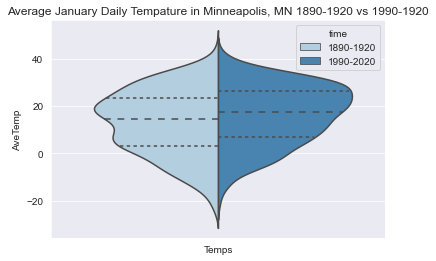

In [108]:
import matplotlib.pyplot as plt
#violin plot
ax = sns.violinplot(x=['Temps']*len(old_and_present),
                    y="AveTemp",hue='time',data=old_and_present,
                    split=True,palette='Blues',inner="quart",)
plt.title('Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')
                    
                   


    # Draw a nested violinplot and split the violins for easier comparison
#sns.violinplot(x=['Data']*len(tips),y="total_bill", hue="smoker",
               #split=True, inner="quart",
               #palette={"Yes": "y", "No": "b"},
               #data=tips)
#sns.despine(left=True)

Box Plot of average Tempatures in 1890-1920 time peroid vs 1990-2020 time peroid.

Text(0.5, 1.0, 'Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

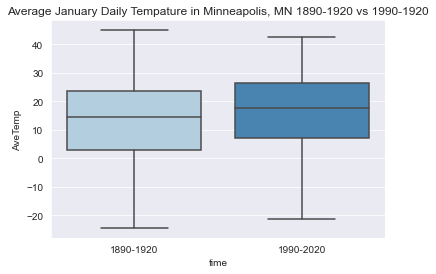

In [100]:
# boxplot
sns.color_palette('deep')
sns.set_style('darkgrid')

ax = sns.boxplot(x="time",y="AveTemp",data=old_and_present,palette='Blues')
plt.title('Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

Find rempature trend in summer

In [145]:
# query to segment out summer
temps.loc[100:].query("season =='Fall'").groupby('year')['AveTemp'].max()

year
1872    60.0
1873    72.5
1874    79.0
1875    79.0
1876    66.5
        ... 
2016    76.0
2017    83.5
2018    81.0
2019    79.0
2020    73.0
Name: AveTemp, Length: 149, dtype: float64

In [150]:
temps.dtypes

MaxTemp          int64
MinTemp          int64
Date            object
day              int64
month            int64
year             int64
season          object
datetime        object
AveTemp        float64
HighLowDiff      int64
dtype: object

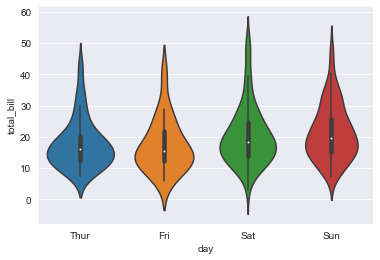

In [160]:
tips = sns.load_dataset("tips")

ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [161]:
# convert string to catogory
temps['cat'] = temps['season'].astype("category")
temps.dtypes

MaxTemp           int64
MinTemp           int64
Date             object
day               int64
month             int64
year              int64
season           object
datetime         object
AveTemp         float64
HighLowDiff       int64
cat            category
dtype: object

In [167]:
temps.groupby('season').count()

,MaxTemp,MinTemp,Date,day,month,year,datetime,AveTemp,HighLowDiff,cat
season,,,,,,,,,,
Fall,13529,13529,13529,13529,13529,13529,13529,13529,13529,13529
Spring,13615,13615,13615,13615,13615,13615,13615,13615,13615,13615
Summer,13616,13616,13616,13616,13616,13616,13616,13616,13616,13616
Winter,13387,13387,13387,13387,13387,13387,13387,13387,13387,13387


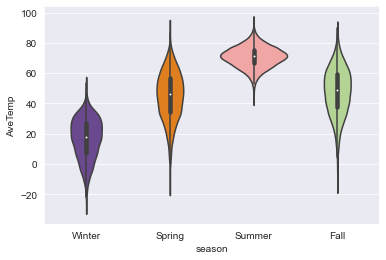

In [172]:
ax=sns.violinplot(x=temps['season'],y=temps['AveTemp'],palette='Paired_r')

tempature patterns in diff seasons

In [162]:
# seaborn violin for diff seasons
ax = sns.boxplot(x='cat',y='MaxTemp', data='temps')

AttributeError: 'str' object has no attribute 'get'

In [158]:
ax = sns.boxplot(x='cat',y='AveTemp', data='temps')

AttributeError: 'str' object has no attribute 'get'

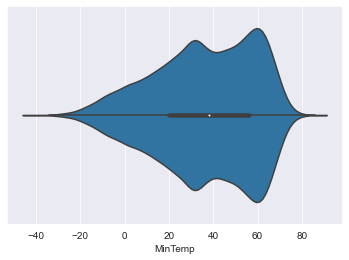

In [159]:
ax = sns.violinplot(x=temps["MinTemp"])

In [101]:
# groupby average low temp and plot
#jan.groupby('year')['MinTemp'].mean()
# df for average low temps
ave_jan_low = jan.groupby('year')['MinTemp'].mean()
ave_jan_low = ave_jan_low.to_frame()
ave_jan_low = ave_jan_low.reset_index()

In [102]:
# plot
style.use('fivethirtyeight')
sns.lmplot(x='year',y='MinTemp', data=ave_jan_low)
grid=True

NameError: name 'style' is not defined